In [1]:
import numpy as np

from fpcross import init_jupyter, Model, Solver, SolversCheck

init_jupyter()

Start |  3:25PM MSK on Oct 03, 2019 |
-------------------------------------


In [2]:
MD = Model('fpe_1d_drift_zero')
MD.init(s=0.1, D=0.02)
MD.info()

<div class="head0">
            <div class="head0__name">fpe_1d_drift_zero</div>
            <div class="head0__note">One-dimensional Focker-Planck equation with the zero drift [FPE, 1D, analyt, time-diffusion].</div>
        </div><div class="head2">
            <div class="head2__name">Parameters</div>
            <div class="head2__note"><ul><li>s =   0.1000 [Initial variance]<div>Variance of the initial condition (type: float, default:   0.1000)</div></li><li>D =   0.0200 [Diffusion coefficient]<div>Scalar diffusion coefficient (type: float, default:   0.0200)</div></li></ul></div>
        </div><div class="head1">
            <div class="head1__name">Description</div>
        </div>
Consider
$$
    d x = f(x, t) \, dt + S(x, t) \, d \beta,
    \quad
    d \beta \, d \beta^{\top} = Q(t) dt,
    \quad
    x(0) = x_0 \sim \rho(x, 0) = \rho_0 (x),
$$
$$
    \frac{\partial \rho(x, t)}{\partial t} =
        \sum_{i=1}^d \sum_{j=1}^d
            \frac{\partial^2}{\partial x_i \partial x_j}
            \left[ D_{ij}(x, t) \rho(x, t) \right]
        - \sum_{i=1}^d
            \frac{\partial}{\partial x_i}
            \left[ f_i(x, t) \rho(x, t) \right],
    \quad
     D(x, t) = \frac{1}{2} S(x, t) Q(t) S(x, t)^{\top},
$$
where spatial $d$-dimensional ($d \ge 1$) variable $x \in R^d$ has probability density function (PDF) $\rho(x, t)$, $\beta$ is Brownian motion of dimension $q$ ($q \ge 1$, and we assume below that $q = d$), $f(x, t) \in R^d$ is a vector-function, $S(x, t) \in R^{d \times q}$ and $Q(t) \in R^{q \times q}$ are matrix-functions and $D(x, t) \in R^{d \times d}$ is a diffusion tensor.

Let
$$
    Q(t) \equiv I,
    \,
    S(x, t) \equiv \sqrt{2 D_c} I
    \implies
    D(x, t) \equiv D_c I,
$$
and
$$
    d = 1,
    \quad
    x \in \Omega,
    \quad
    \rho(x, t) |_{\partial \Omega} \approx 0,
    \quad
    f(x, t) \equiv 0,
    \quad
    \rho_0(x) = \frac{1}{\sqrt{2 \pi s}}\exp{\left[-\frac{x^2}{2s}\right]}.
$$

It can be shown that the analytic solution is
$$
    \rho(x, t) =
        \frac
            {
                1
            }
            {
                \sqrt{2 \pi s + 4 \pi D t}
            }
        \exp{ \left[
            - \frac
                {
                    x^2
                }
                {
                    2  s + 4 D t
                }
        \right] }.
$$
    <div class="note">Since interpolation is not required for the case of the zero drift ($f \equiv 0$), but our solver calculates it by design, then it is expected to operate much slower than another simple solvers.</div><div class="end"></div>

In [4]:
SL = Solver(model=MD)
SL.set_grid_t(1000, 0., 1., t_hst=10)
SL.set_grid_x(101, -5., 5.)
SL.prep()
SL.calc()
SL.info()

Solve: 100%|██| 999/999 [00:03<00:00, 251.04step/s, | At T=1.0e+00 : er=9.5e-13]

----------- Solver
Format    : 1D, NP [order=2]
Grid t    : poi =      1000, min =    0.0000, max =    1.0000
Grid x    : poi =       101, min =   -5.0000, max =    5.0000
Time sec  : prep = 2.04e-02, calc = 3.93e+00, spec = 4.95e-02
Err real  : 9.45e-13


In [ ]:
opts = { 'is_log': True, 'is_abs': False, 'is_err_abs': False, 'with_err_stat': False }
SL.plot_t(-2.5, opts)
SL.plot_t(+0.0, opts)
SL.plot_t(+2.5, opts)

In [ ]:
opts = { 'is_log': True, 'is_abs': False, 'is_err_abs': False, 'with_err_stat': False }
SL.plot_x(+0.1, opts)
SL.plot_x(+0.5, opts)
SL.plot_x(None, opts)

<div class="head1">
    <div class="head1__name">
        Results for multiple computations
    </div>
    <div class="head1__note">
        We use results that already saved to file (see computation code in notebook `multi_solve.ipynb`).
    </div>
</div>

In [4]:
SLC = SolversCheck('./../computations/data/fpe_1d_drift_zero')
SLC.load()

name1 = 'Solver (ord=1)'
name2 = 'Solver (ord=2)'

M = SLC.res[name2]['M']
N = SLC.res[name2]['N']

m = M[-1]
n = N[-1]

<div class="head2">
    <div class="head2__name">
        Dependence on the number of time points
    </div>
    <div class="head2__note">
        We present results for NP-solver of the 2th order.
    </div>
</div>

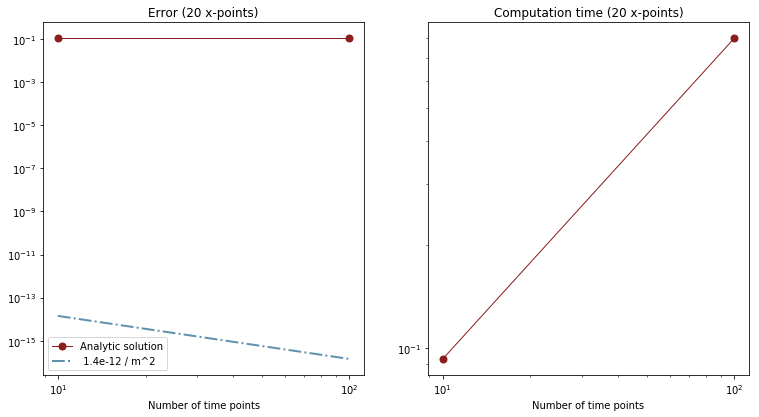

In [5]:
SLC.plot(name2, n=n, is_stat=False, lims={ 'all': [0, None] })

<div class="head2">
    <div class="head2__name">
        Dependence on the number of spatial points
    </div>
    <div class="head2__note">
        We present results for NP-solver of the 2th order.
    </div>
</div>

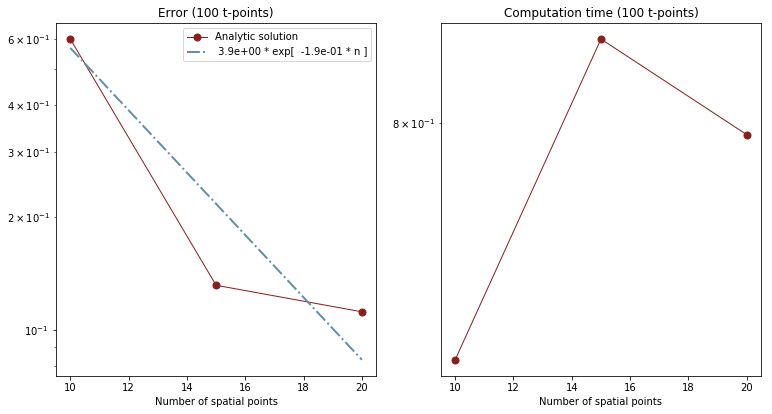

In [6]:
SLC.plot(name2, m=m, is_stat=False, lims={ 'all': [0, None] })

<div class="head2">
    <div class="head2__name">
        Dependence on the solver order
    </div>
    <div class="head2__note">
        We present results (dependencies on the number of time and spatial points) for NP-solvers of various orders.
    </div>
</div>

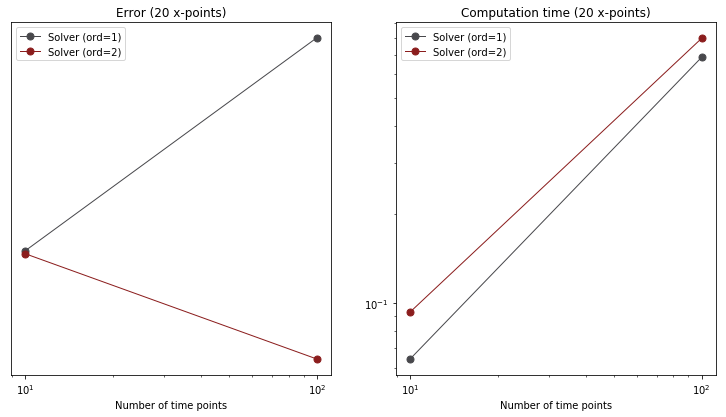

In [7]:
SLC.plot_all(n=n, is_stat=False)

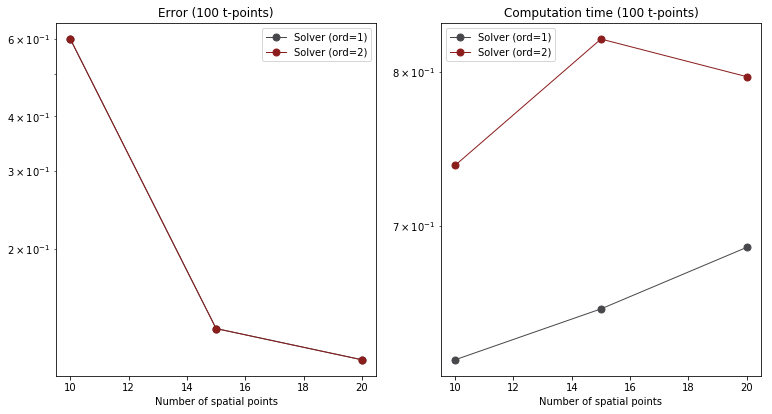

In [8]:
SLC.plot_all(m=m, is_stat=False)

<div class="head1">
    <div class="head1__name">
        Explicit (simple) solvers
    </div>
    <div class="head1__note">
        Only for example and tests.
    </div>
</div>

In [8]:
import time
import numpy as np
import scipy.sparse as sp
from scipy.integrate import solve_ivp
from scipy.linalg import expm as expm
import matplotlib.pyplot as plt

from intertrain import Intertrain

In [9]:
d = 1
m = t_poi
n = x_poi
l = (x_max - x_min) / (x_poi - 1)
h = (t_max - t_min) / (t_poi - 1)
T = np.linspace(t_min, t_max, t_poi)

J = np.eye(n); J[0, 0] = 0.; J[-1, -1] = 0. 

In [10]:
def show_x(X, r_calc, _time):
    X = X.reshape(1, -1)
    r_init = func_r0(X)
    r_real = func_rt(X, t_max)
    r_stat = func_rs(X)
    e = np.linalg.norm(r_real - r_calc) / np.linalg.norm(r_real)

    print('Number of spatial points : %8d'%x_poi)
    print('Number of time points    : %8d'%t_poi)
    print('Error (relative norm)    : %-12.2e'%e)
    print('Total time (sec)         : %-12.2e'%_time)
    print()
    
    plt.plot(
        X.reshape(-1), r_init, '--', label='Initial',
        linewidth=3, color='tab:blue'
    )
    plt.plot(
        X.reshape(-1), r_calc, label='Calculated',
        linewidth=1, color='tab:green', marker='o', markersize=7,
        markerfacecolor='lightgreen', markeredgecolor='g'
    )
    plt.plot(
        X.reshape(-1), r_real, label='Analytic',
        linewidth=3, color='black'
    )
    plt.plot(
        X.reshape(-1), r_stat, '--', label='Stationary',
        linewidth=2, color='magenta'
    )
    
    plt.title('Solution at the final time step')
    plt.xlabel('x')
    plt.ylabel('r')
    plt.legend(loc='best')
    plt.show()

<div class="head2">
    <div class="head2__name">
        Uniform spatial grid and the forward Euler scheme
    </div>
</div>

We can solve equation on the uniform spatial grid for the time $t > 0$ using standard forward Euler scheme
$$
    r_{k+1} = r_{k} + h D r_{k},
    \quad
    k = 0, 1, \ldots, m-1,
$$
where
$$
    D = \frac{D_{coef}}{l^2} tridiag \left( 1, -2, 1 \right).
$$

Number of spatial points :      101
Number of time points    :     1000
Error (relative norm)    : 2.15e-03    
Total time (sec)         : 1.13e-02    



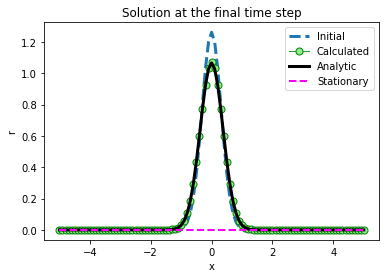

In [11]:
_time = time.time()

X = np.linspace(x_min, x_max, x_poi).reshape(1, -1)

D = sp.spdiags([
        [+1.] * x_poi,
        [-2.] * x_poi,
        [+1.] * x_poi
    ], [-1, 0, 1], x_poi, x_poi
).tocsr().toarray()
D = D * D_coef / l / l

Z = h * D

r = func_r0(X)
for t in T[1:]:
    r = r + Z @ r

show_x(X, r, time.time() - _time)

<div class="head2">
    <div class="head2__name">
        Uniform spatial grid and the backward Euler scheme
    </div>
</div>

We can solve equation on the uniform spatial grid for the time $t > 0$ using standard backward Euler scheme
$$
    A r_{k+1} = r_{k},
    \quad
    k = 0, 1, \ldots, m-1,
$$
where
$$
    A = tridiag \left( -F, 1+2F, -F \right),
    \quad
    F = \frac{h \cdot D_{coef}}{l^2}.
$$

Number of spatial points :      101
Number of time points    :     1000
Error (relative norm)    : 2.20e-03    
Total time (sec)         : 1.11e-01    



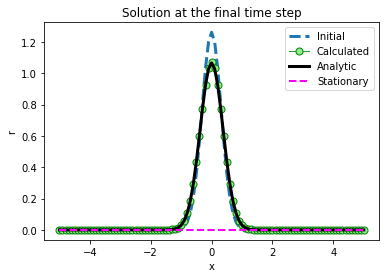

In [12]:
_time = time.time()

X = np.linspace(x_min, x_max, x_poi).reshape(1, -1)

F = h * D_coef / l / l
D = sp.spdiags([
        [-1. * F] * x_poi,
        [+2. * F + 1.] * x_poi,
        [-1. * F] * x_poi
    ], [-1, 0, 1], x_poi, x_poi
).tocsr().toarray()
  
Z = D

r = func_r0(X)
for t in T[1:]:
    r = np.linalg.solve(Z, r)

show_x(X, r, time.time() - _time)

<div class="head2">
    <div class="head2__name">
        Uniform spatial grid and the matrix exponential
    </div>
</div>

We can solve equation on the uniform spatial grid for the time $t > 0$ using matrix exponential and the 2th order finite difference matrix
$$
    u_{t} = e^{t \cdot D_{coef} \cdot D} u_{0},
$$
where $u_{0}(x)$ is the known initial condition.

Number of spatial points :      101
Number of time points    :     1000
Error (relative norm)    : 2.18e-03    
Total time (sec)         : 6.21e-03    



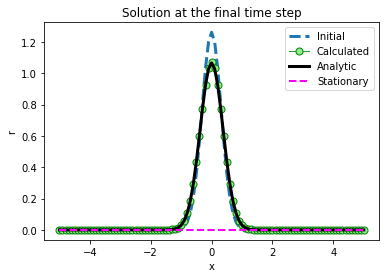

In [13]:
_time = time.time()

X = np.linspace(x_min, x_max, x_poi).reshape(1, -1)

D = sp.spdiags([
        [+1.] * x_poi,
        [-2.] * x_poi,
        [+1.] * x_poi
    ], [-1, 0, 1], x_poi, x_poi
).tocsr().toarray()
D = D * D_coef / l / l
  
Z = expm((t_max - t_min) * D)

r = func_r0(X)
r = Z@r

show_x(X, r, time.time() - _time)

<div class="head2">
    <div class="head2__name">
        Chebyshev spatial grid and the matrix exponential
    </div>
</div>

We can solve equation on the Chebyshev spatial grid for the time $t > 0$ using matrix exponential and the 2th order Chebyshev differentiation matrix
$$
    u_{t} = e^{t \cdot D_{coef} \cdot D} u_{0},
$$
where $u_{0}(x)$ is the known initial condition.

Number of spatial points :      101
Number of time points    :     1000
Error (relative norm)    : 5.90e-13    
Total time (sec)         : 8.19e-03    



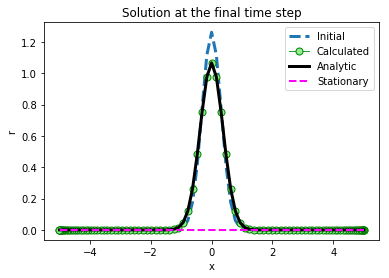

In [14]:
_time = time.time()

IT = Intertrain(n=[x_poi], l=[[x_min, x_max]])

X = IT.grid()

D = D_coef * IT.dif2()

J = np.eye(n); J[0, 0] = 0.; J[-1, -1] = 0.    
Z = expm((t_max - t_min) * J @ D)

r = func_r0(X)
r = Z@r

show_x(X, r, time.time() - _time)

<div class="end"></div>